In [1]:
import pandas as pd

In [2]:
data_train = pd.read_csv(r"C:\Users\s8908\Iris - Iris.csv")

In [3]:
data_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
X_train = data_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [5]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y_train = data_train['Species']

In [8]:
y_train

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

# AS USING CART-DECISION TREE ALGORITHM WE NEED TO CONVERT TARGET VARIABLE TO CLASS LABEL

In [6]:
from sklearn.preprocessing import LabelEncoder


In [9]:
encoder = LabelEncoder()
label_y=encoder.fit_transform(y_train)

In [11]:
label_y = pd.DataFrame(label_y)

In [12]:
label_y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [18]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt 

In [14]:
tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)


In [15]:
tree_classifier.fit(X_train, label_y)


DecisionTreeClassifier(random_state=42)

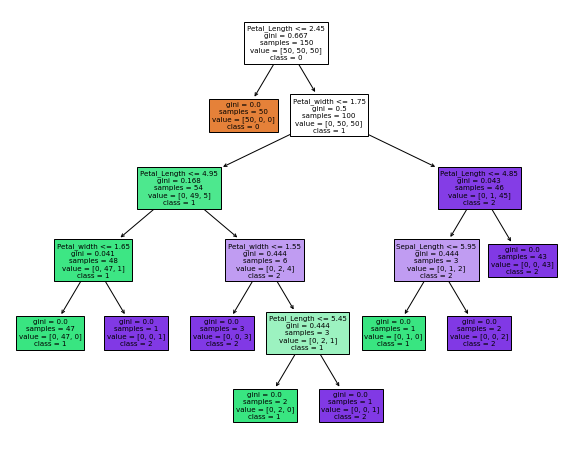

In [19]:
# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(tree_classifier, filled=True, feature_names=["Sepal_Length", "Sepal_width", "Petal_Length", "Petal_width"], class_names=["0", "1", "2"])
plt.show()

In [21]:
#accuracy of model on train data

In [22]:
y_pred_train=tree_classifier.predict(X_train)

In [23]:
from sklearn.metrics import accuracy_score

In [27]:
# Calculate accuracy
accuracy = accuracy_score(label_y, y_pred_train)
print("Accuracy:", accuracy)






Accuracy: 1.0


# Model is undergoing overfitting due to low data records, hence we will try using Randomised search cv to tune best hyperparameter for our model

In [29]:
from sklearn.model_selection import RandomizedSearchCV
tree_classifier_search = DecisionTreeClassifier()
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(tree_classifier_search, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Perform the random search
random_search.fit(X_train, label_y)



RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='accuracy')

In [30]:
# Print best hyperparameters and corresponding accuracy score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 15, 'criterion': 'gini'}
Best Accuracy: 0.9666666666666668


In [31]:
best_model= random_search.best_estimator_

In [39]:
best_model.fit(X_train,label_y)

DecisionTreeClassifier(max_depth=15, min_samples_split=5)

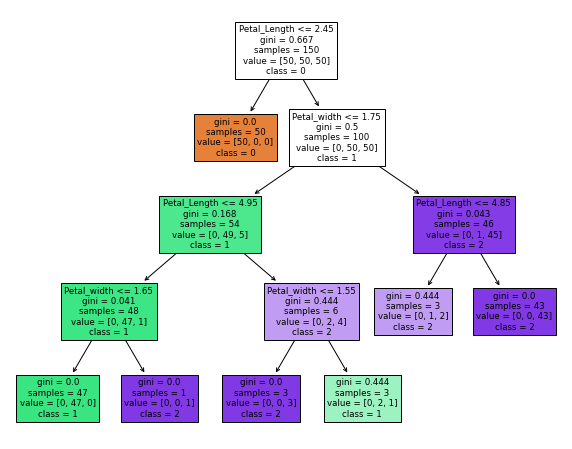

In [40]:
# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(best_model, filled=True, feature_names=["Sepal_Length", "Sepal_width", "Petal_Length", "Petal_width"], class_names=["0", "1", "2"])
plt.show()

In [41]:
y_prediction_train = best_model.predict(X_train)

In [42]:
accuracy_best = accuracy_score(label_y,y_prediction_train)

In [44]:
print(accuracy_best)

0.9866666666666667


# OUR MODEL HAS GOOD ACCURACY OF 98 %